In [1]:
"""
This file is used to generate linearly seperable data
- Author: Patel Jainil Subhashkumar (21114072)

- Take random line y = mx + c
- Generate random points and classify them as 1 or 0
- take 5% of total points and flip their labels
"""

import csv
import random

# y = mx + c
m = int(input("Enter m: "))
c = int(input("Enter c: "))
n = int(input("Enter number of points: "))
flip = int(input("Enter percentage of points to flip: "))

# Generate 1000 points
X = []
Y = []
true_label = []

for i in range(n):
    x = random.uniform(-100, 100)
    y = random.uniform(-100, 100)
    X.append(x)
    Y.append(y)
    if y > m*x + c:
        true_label.append(1)
    elif y < m*x + c:
        true_label.append(-1)
    else:
        true_label.append(0)

# Flip labels
for i in range(int(n*flip/100)):
    if true_label[i] == -1:
        true_label[i] = 1
    else:
        true_label[i] = -1

# Write to csv file
with open('./nonLinearSeperableData.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for i in range(n):
        writer.writerow([X[i], Y[i], true_label[i]])
        
print("Data generated and saved in nonLinearSeperableData.csv")

Data generated and saved in nonLinearSeperableData.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [3]:
# Read the X from the csv file
dataFrame = pd.read_csv('./nonLinearSeperableData.csv', header=None)
dataFrame.columns = ['x1', 'x2', 'y']
print(dataFrame.head())

# convert the dataFrame to numpy array
X = np.array(dataFrame[['x1', 'x2']])
Y = np.array(dataFrame['y'])

          x1         x2  y
0  96.166263 -91.947265  1
1  45.983308 -41.053861  1
2  48.874807 -91.619282  1
3  47.821899  94.251374  1
4 -13.339246 -25.409720 -1


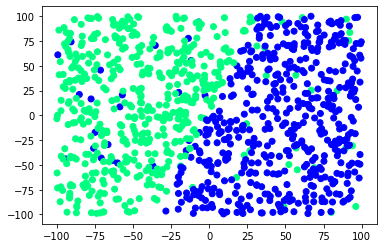

In [4]:
# ploting the X
plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter')
plt.show()

In [6]:
# Pocket Algorithm

numFeatures = 2
weights = np.zeros(numFeatures)
weights[0] = 1000
weights[1] = 10
ERROR = 10000000000000
learningRate = 0.2
print("Dimension of weights: ", weights.shape)
print("Dimension of X[0]: ", X.shape)
print("Dimension of Y[0]: ", Y.shape)
done = False
error = []

while not done:
    misclassified = 0
    tempWeights = weights
    for i in range(len(X)):
        predicted = np.sign(np.dot(X[i], tempWeights))

        if predicted != Y[i]:
            misclassified += 1
            tempWeights += learningRate * X[i] * (Y[i] - predicted)

    err = (misclassified / len(X)) * 100

    if (misclassified == 0) or (err > ERROR):
        done = True
        break

    ERROR = err
    weights = tempWeights
    error.append(err)

print("Weights: ", weights)

Dimension of weights:  (2,)
Dimension of X[0]:  (1000, 2)
Dimension of Y[0]:  (1000,)
Weights:  [-105.03757971   31.01922223]


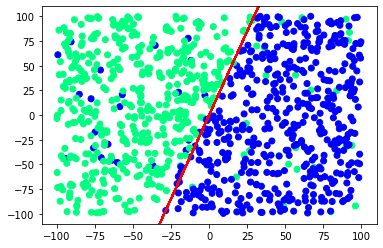

In [7]:
# plot data with linear seperator using weights
y_pred = []
for i in range(len(X)):
    y_pred.append(0 if np.sign(np.dot(X[i], weights)) == 1 else 1)

plt.scatter(X[:,0], X[:,1], c=Y, cmap='winter')
plt.plot(X[:,0], (-weights[0]/weights[1])*X[:,0], 'r-')
plt.xlim(-110, 110)
plt.ylim(-110, 110)
plt.show()

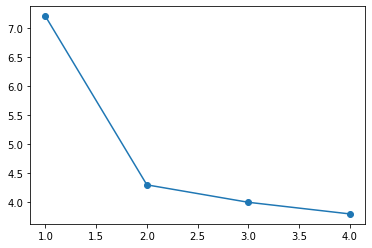

In [8]:
# plot error vs iteration
plt.plot(range(1, len(error)+1), error, marker='o')
